## Load and prepare data

In [5]:
import os
import sys
# Import files from src as relative import
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src import data_processing as dp

filename = "../../data/sample_temperature_data_for_coding_challenge.csv"

data = dp.preprocess_dataset(filename)
X = dp.generate_evaluation_data(data)


Column names are source_id, datetime, property_name, temperature
Processed 1001 lines.


## Fit model and evaluate

In [6]:
import pandas as pd
from sklearn.ensemble import IsolationForest

model = IsolationForest(random_state=0).fit(X)

result = model.predict(X)

print(pd.DataFrame(result, columns=["Prediction"])["Prediction"].value_counts())

 1    618
-1     98
Name: Prediction, dtype: int64


Plot results

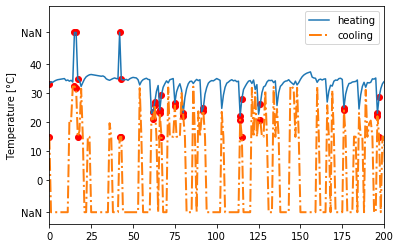

In [12]:
import matplotlib.pyplot as plt
import numpy as np

max_x = 200  #zoom in data

x = np.arange(len(X))
y = X[:,1]
plt.plot(x, y, label="heating")
y = X[:,2]
plt.plot(x, y, label="cooling", ls='-.', linewidth=2)

x = np.arange(len(X))[result==-1]
y = X[:,1][result==-1]
plt.scatter(x, y, c='red')

x = np.arange(len(X))[result==-1]
y = X[:,2][result==-1]
plt.scatter(x, y, c='red')
plt.ylim(-15,60)
plt.xlim(0,max_x)
plt.legend(loc="upper right")
plt.ylabel("Temperature [°C]")

ax = plt.gca()
ax.set_yticks([-11,0,10,20,30,40,51])
ax.set_yticklabels(["NaN",0,10,20,30,40,"NaN"])

plt.show()

## Save model

In [6]:
import os
from datetime import datetime
import pickle

# save model to folder "model" with current date
now = datetime.now()
filename = "../model/isolation_forest_" + now.strftime("%Y%m%d")

with open(filename,'wb') as f:
    pickle.dump(model,f)